# Lane–Emden Equation
### Greg Lu & Eun Ju Jong
### CIS-397
### Dr. Hallenbeck

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [3]:
def movespines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

## Lane-Emden Equation:

The differential equation we looked at is the Lane-Emden equation: $$\frac{1}{\xi^2} \frac{d}{d\xi}(\xi^2 \frac{d\theta}{d\xi}) + \theta^n = 0$$ commonly used in astrophysics for studies of the stellar interior -- it defines a relationship between the density and the radius of a stellar object.

If we solve the differential equation above, we should get a function $\theta(\xi)$. For a solution to the equation with a specific $n$, we normally denote it by $$\theta_{n}$$.

## Variables:
Here $\theta$ is related to the density $\rho$ as indicated by the equation: $$\rho = \rho_c \theta_n^n$$ where $\rho_c$ is the central density of a star.

As for independent variable $\xi$, it is a dimentionless radius.

Here $n$ is the polytropic index that appears in the polytropic equation of state. (We'll talk more about this equation later.)

## General Solution:
For the general solutions to the equation, since this is a second order ODE, we'll need 2 initial conditions to solve for a particular solution. 

The initial conditions we need are $\theta(\xi_1)= a$ and $\theta'(\xi_1) = b$ where $a$ and $b$ are real numbers. (Explain why in the presentation)

Once we have the particular solution we can use it to compute other related information such as pressure and the temperature.

### So what can it be used for ?

## Density

First off, as we have mentioned already, we can use it to calculate density with the equation:
$$\rho = \rho_c \theta_n^n$$.

However in order to obtain the density $\rho$, we'll need some addtional information -- density of the stellar object at a certain radius. (Demo on the board, let $n =1$, $\rho = 5$, and $\xi = 1$.)

## Pressure
Consequently, after knowing the density $\rho$ we can move on to compute the pressure $P$. Here we'll need to use the polytropic equation of state: $$P = K\rho^{\frac{1}{1+n}}$$ or $$P = K \rho_c^{\frac{1}{1+n}} \theta_n^{n+1}.$$

Here $K$ is just a constant of proportionality.

## Temperature
Finally, we can use the solution to the differential equation to calculate the temperature $T$ by the following equation: $$T = \frac{K \mu}{k_{B}} \rho_c^{\frac{1}{n}} \theta_n.$$

Here $K$ is again the constant of proportionality, $k_B$ is the Boltzmann constant.

#### Note.
- Above is some background and application information regarding the Lane-Emden Equation, now let's move on to numerical solutions
<br>
<br>
- At first sight, one thing that distinguishes the Lane-Emden equation from other ordinary differential equations(ODEs) is that there's an additional variable $n$ involved. As it turns out, while we can numerically approximate the solution for any positive $n$ value, we can only analytically solve the differential equation (using non-numerical methods) for $n = 0, 1, 5$.

In [4]:
def verlet(y_0, dydx_0, f, x):
    dx = x[1] - x[0]
    y = [y_0]
    dydx = [dydx_0]
    
    y_1 = y[0] + dydx[0]*dx + 0.5*f(x[0], y[0], dydx[0])*dx**2
    y.append(y_1)
    
    #Central Difference Method for the 1st order derivative
    dydx_1 = (y[1] - y[0]) / dx
    dydx.append(dydx_1)
    
    for i in np.arange(1, len(x) - 1):
        y.append(2*y[i] - y[i-1] + f(x[i], y[i], dydx[i])*dx**2)
        dydx.append((y[i+1] - y[i - 1]) / (2*dx))
        
    return y

In [5]:
def Lane_Emden(x, y, dydx):
    return -dydx * 2 / x - y**n

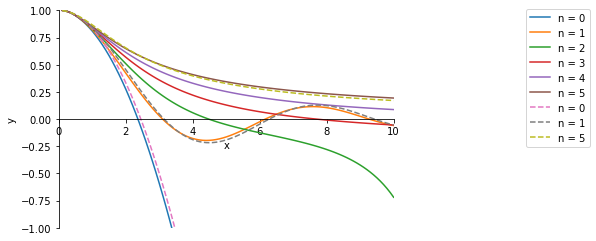

In [6]:
y_0 = 1
dydx_0 = 0
x = np.linspace(0.1, 10, 100)

for n in range(6):
    plt.plot(x, verlet(y_0, dydx_0, Lane_Emden, x), label = 'n = ' + str(n) )

for n in [0, 1, 5]:
    if n == 0: 
        f = 1 - 1/6*x**2
    elif n == 1: 
        f = np.sin(x)/x
    elif n == 5: 
        f = 1/np.sqrt(1 + (x**2)/3)
    plt.plot(x, f, '--', label = "n = " + str(n))
    
plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1.03))
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-1, 1)
movespines()

plt.show()

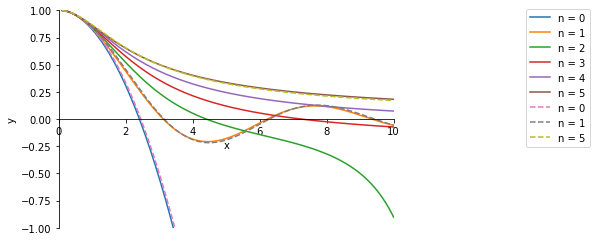

In [7]:
y_0 = 1
dydx_0 = 0
x = np.linspace(0.1, 10, 200)

for n in range(6):
    plt.plot(x, verlet(y_0, dydx_0, Lane_Emden, x), label = 'n = ' + str(n) )

for n in [0, 1, 5]:
    if n == 0: 
        f = 1 - 1/6*x**2
    elif n == 1: 
        f = np.sin(x)/x
    elif n == 5: 
        f = 1/np.sqrt(1 + (x**2)/3)
    plt.plot(x, f, '--', label = "n = " + str(n))
    
plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1.03))
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-1, 1)
movespines()

plt.show()

Reference: https://en.wikipedia.org/wiki/Lane%E2%80%93Emden_equation